# Resolução Exercício

![alt text](Enunciado1.1.png)

![alt text](Enunciado1.2.png)

![alt text](Enunciado1.3.png)

![alt text](Enunciado1.4.png)


Calculando N = 100...
  Fração 0.0%: 0.02 segundos
  Fração 1.0%: 0.00 segundos
  Fração 2.0%: 0.00 segundos
  Fração 3.0%: 0.00 segundos
  Fração 4.0%: 0.00 segundos
  Fração 5.0%: 0.00 segundos


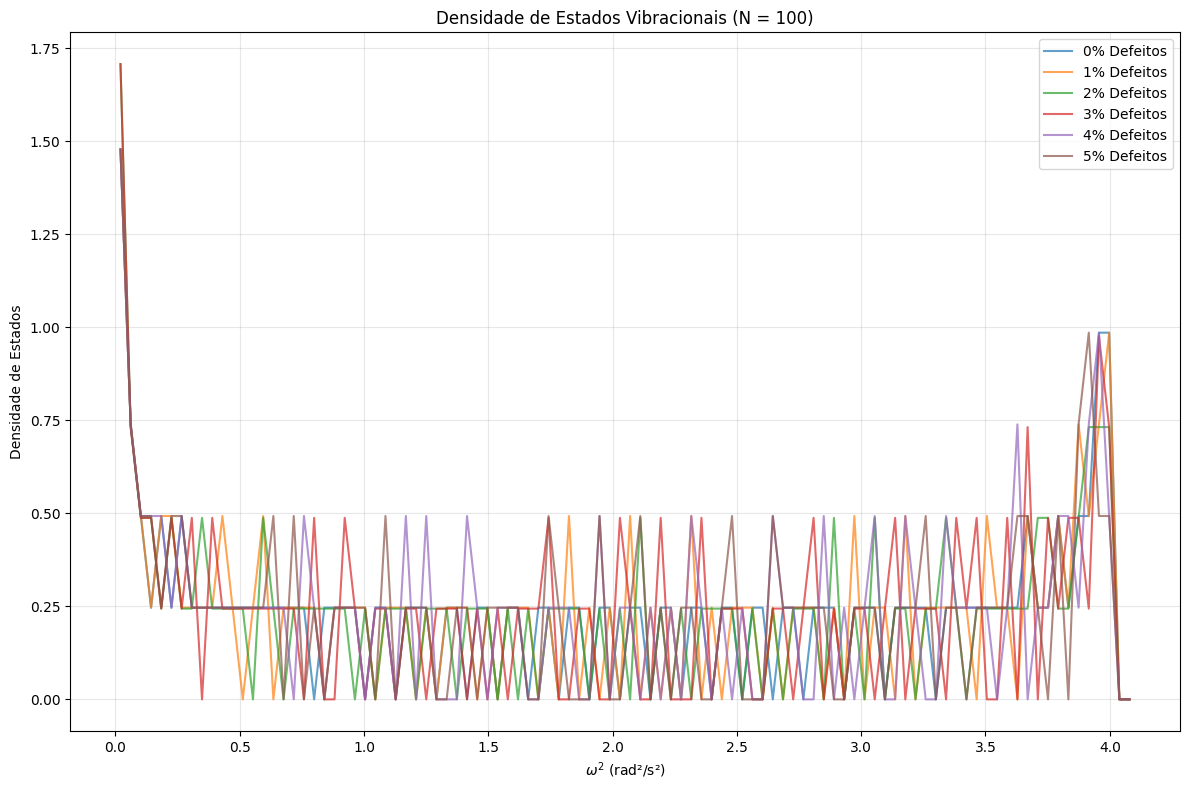


Calculando N = 1000...
  Fração 0.0%: 0.02 segundos
  Fração 1.0%: 0.02 segundos
  Fração 2.0%: 0.01 segundos
  Fração 3.0%: 0.02 segundos
  Fração 4.0%: 0.01 segundos
  Fração 5.0%: 0.02 segundos


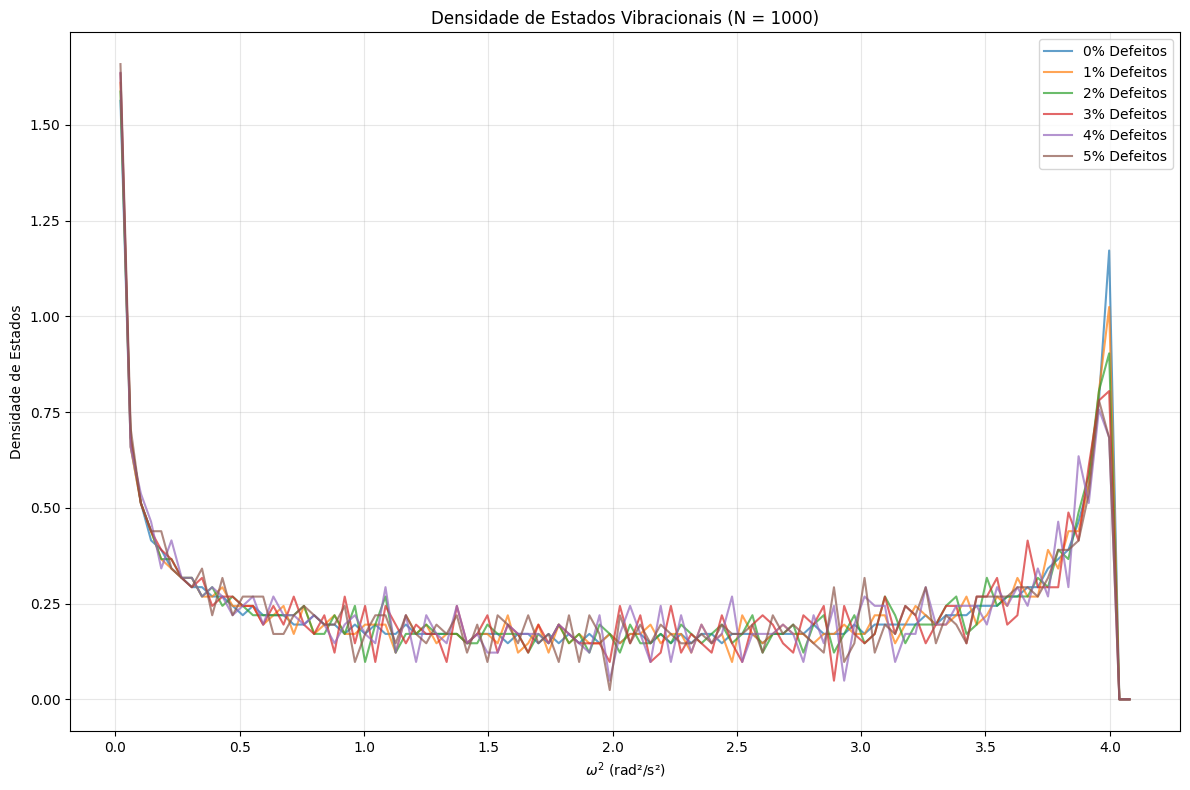


Calculando N = 10000...
  Fração 0.0%: 1.19 segundos
  Fração 1.0%: 1.26 segundos
  Fração 2.0%: 1.18 segundos
  Fração 3.0%: 1.17 segundos
  Fração 4.0%: 1.19 segundos
  Fração 5.0%: 1.22 segundos


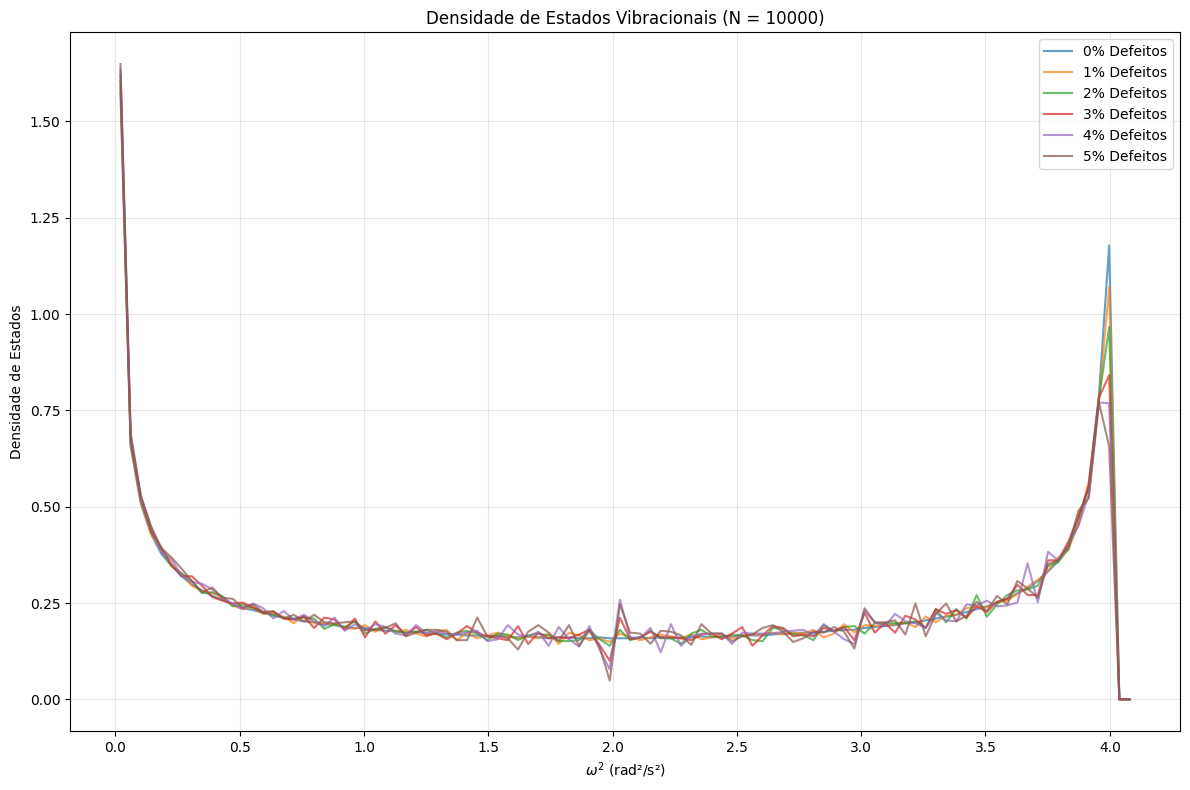

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import time

# Parâmetros físicos
m = 1.0          # Massa base (kg)
k = 1.0           # Constante elástica (kg/s²)
N_values = [100, 1000, 10000]  # Tamanhos das cadeias
defect_fractions = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05]  # Frações de defeitos
num_bins = 100    # Número de bins para histogramas
omega2_max = 4.1  # Valor máximo de ω² para histogramas (k/m = 1)
np.random.seed(42) # Semente para reprodutibilidade

# Função para gerar vetor de massas com defeitos
def generate_masses(N, defect_fraction):
    masses = np.full(N, m)  # Todos átomos com massa m
    if defect_fraction > 0:
        num_defects = int(N * defect_fraction)
        defect_indices = np.random.choice(N, num_defects, replace=False)
        masses[defect_indices] = 3 * m  # Defeitos com massa 3m
    return masses

# Função para calcular as frequências ao quadrado (autovalores)
def compute_frequencies(masses, k):
    N = len(masses)
    # Diagonal principal
    main_diag = np.zeros(N)
    main_diag[0] = k / masses[0]        # Primeiro átomo
    main_diag[-1] = k / masses[-1]       # Último átomo
    if N > 2:
        main_diag[1:-1] = 2 * k / masses[1:-1]  # Átomos internos
    
    # Diagonal secundária
    off_diag = np.zeros(N-1)
    for i in range(N-1):
        off_diag[i] = -k / np.sqrt(masses[i] * masses[i+1])
    
    # Calcular autovalores (ω²)
    eigenvalues = eigh_tridiagonal(main_diag, off_diag, eigvals_only=True)
    return eigenvalues

# Simulação para cada tamanho de cadeia
for N in N_values:
    plt.figure(figsize=(12, 8))
    print(f"\nCalculando N = {N}...")
    
    for frac in defect_fractions:
        start_time = time.time()
        # Gerar massas e calcular frequências
        masses = generate_masses(N, frac)
        eigenvalues = compute_frequencies(masses, k)
        
        # Calcular histograma (Densidade de Estados)
        hist, bin_edges = np.histogram(eigenvalues, bins=num_bins, range=(0, omega2_max), density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Plotar DOS
        plt.plot(bin_centers, hist, alpha=0.7, label=f'{frac*100:.0f}% Defeitos')
        print(f"  Fração {frac*100}%: {time.time()-start_time:.2f} segundos")
    
    plt.title(f'Densidade de Estados Vibracionais (N = {N})')
    plt.xlabel('$\omega^2$ (rad²/s²)')
    plt.ylabel('Densidade de Estados')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'dos_N{N}.png', dpi=300)
    plt.show()

# Versão 2

In [2]:
# Parâmetros
masses = np.array([1.0, 1.0, 3.0, 1.0, 1.0])  # Defeito central 3m
k = 1.0

print("\n=== Cálculo para N=5 Átomos (com defeito central 3m) ===")
print("1. Montando a matriz dinâmica...")

# Diagonal principal
main_diag = np.zeros(5)
main_diag[0] = k / masses[0]        # Extremidades
main_diag[-1] = k / masses[-1]
main_diag[1:-1] = 2 * k / masses[1:-1]  # Átomos internos

# Diagonal secundária
off_diag = np.zeros(4)
for i in range(4):
    off_diag[i] = -k / np.sqrt(masses[i] * masses[i+1])

print("\nMatriz Dinâmica (D):")
print(f"Diagonal principal: {main_diag}")
print(f"Diagonal secundária: {off_diag}")

# Cálculo dos autovalores e autovetores
print("\n2. Calculando autovalores e autovetores...")
eigenvalues, eigenvectors = eigh_tridiagonal(main_diag, off_diag)

print("\nResultados:")
print(f"Autovalores (ω²): {eigenvalues}")
print("\nAutovetores (modos de vibração):")
for i in range(5):
    print(f"Modo {i+1} (ω² = {eigenvalues[i]:.2f}): {eigenvectors[:, i]}")

# Frequências (ω)
print("\n3. Frequências de vibração (ω):")
frequencies = np.sqrt(eigenvalues)
for i in range(5):
    print(f"Modo {i+1}: ω = {frequencies[i]:.2f} rad/s")


=== Cálculo para N=5 Átomos (com defeito central 3m) ===
1. Montando a matriz dinâmica...

Matriz Dinâmica (D):
Diagonal principal: [1.         2.         0.66666667 2.         1.        ]
Diagonal secundária: [-1.         -0.57735027 -0.57735027 -1.        ]

2. Calculando autovalores e autovetores...

Resultados:
Autovalores (ω²): [6.97847469e-17 3.81966011e-01 8.19539578e-01 2.61803399e+00
 2.84712709e+00]

Autovetores (modos de vibração):
Modo 1 (ω² = 0.00): [0.37796447 0.37796447 0.65465367 0.37796447 0.37796447]
Modo 2 (ω² = 0.38): [ 6.01500955e-01  3.71748034e-01  1.59847019e-16 -3.71748034e-01
 -6.01500955e-01]
Modo 3 (ω² = 0.82): [-0.50487576 -0.09111009  0.68818518 -0.09111009 -0.50487576]
Modo 4 (ω² = 2.62): [-3.71748034e-01  6.01500955e-01 -8.88178420e-16 -6.01500955e-01
  3.71748034e-01]
Modo 5 (ω² = 2.85): [ 0.31975511 -0.59062832  0.31277744 -0.59062832  0.31975511]

3. Frequências de vibração (ω):
Modo 1: ω = 0.00 rad/s
Modo 2: ω = 0.62 rad/s
Modo 3: ω = 0.91 rad/s
Mod


Calculando N = 100...
  Fração 0.0%: 0.02 segundos
  Fração 1.0%: 0.01 segundos
  Fração 2.0%: 0.01 segundos
  Fração 3.0%: 0.01 segundos
  Fração 4.0%: 0.00 segundos
  Fração 5.0%: 0.01 segundos


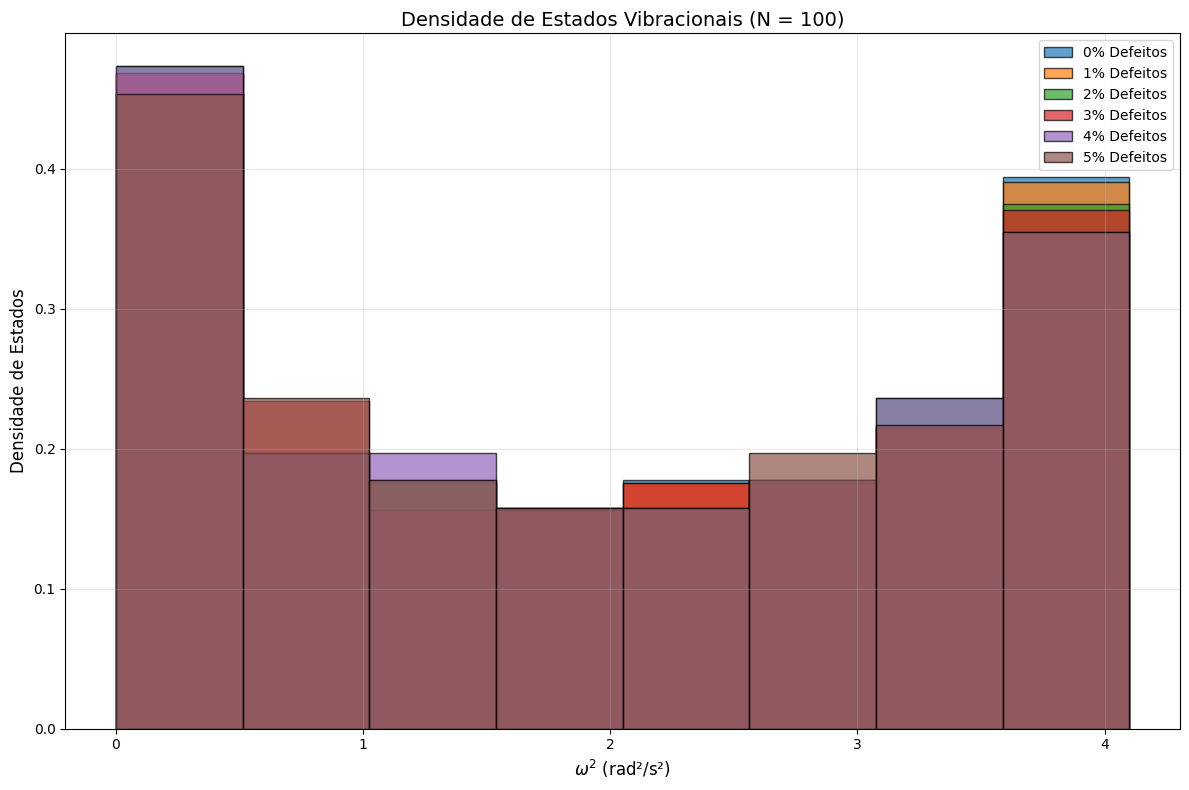


Calculando N = 1000...
  Fração 0.0%: 0.04 segundos
  Fração 1.0%: 0.02 segundos
  Fração 2.0%: 0.02 segundos
  Fração 3.0%: 0.02 segundos
  Fração 4.0%: 0.02 segundos
  Fração 5.0%: 0.02 segundos


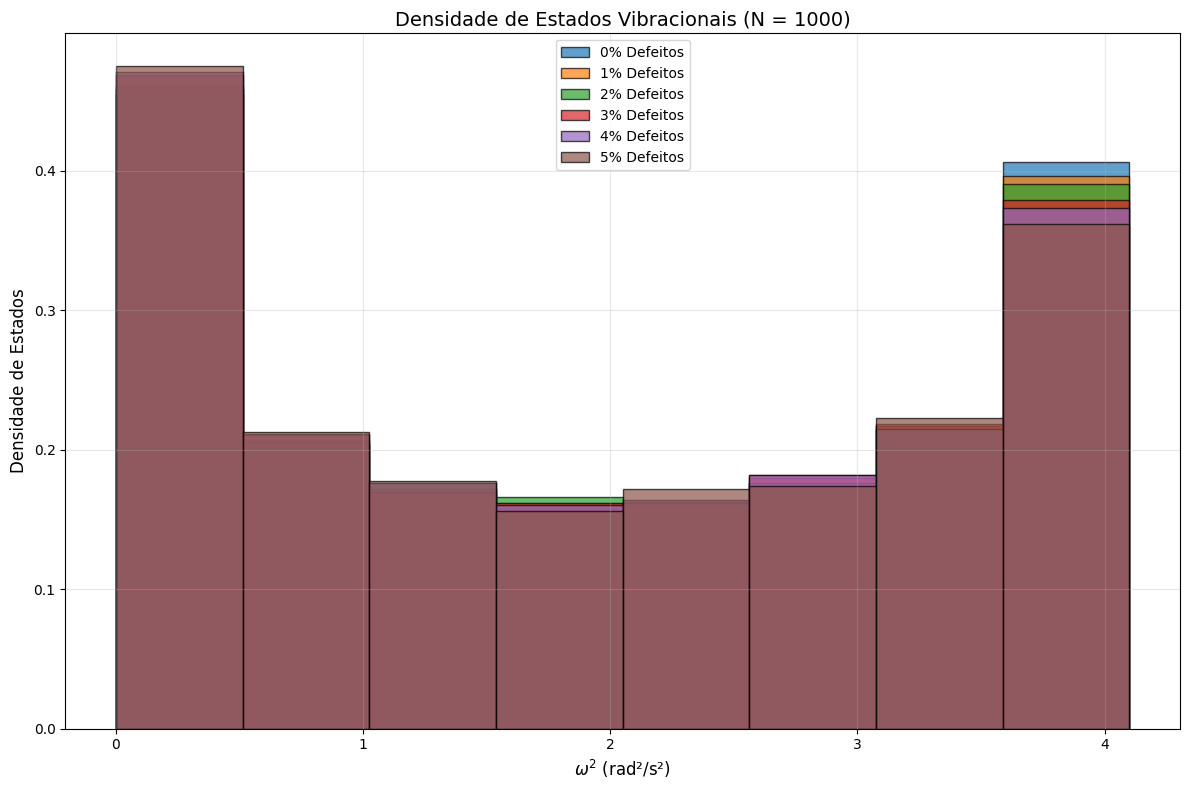


Calculando N = 10000...
  Fração 0.0%: 1.20 segundos
  Fração 1.0%: 1.20 segundos
  Fração 2.0%: 1.17 segundos
  Fração 3.0%: 1.20 segundos
  Fração 4.0%: 1.19 segundos
  Fração 5.0%: 1.23 segundos


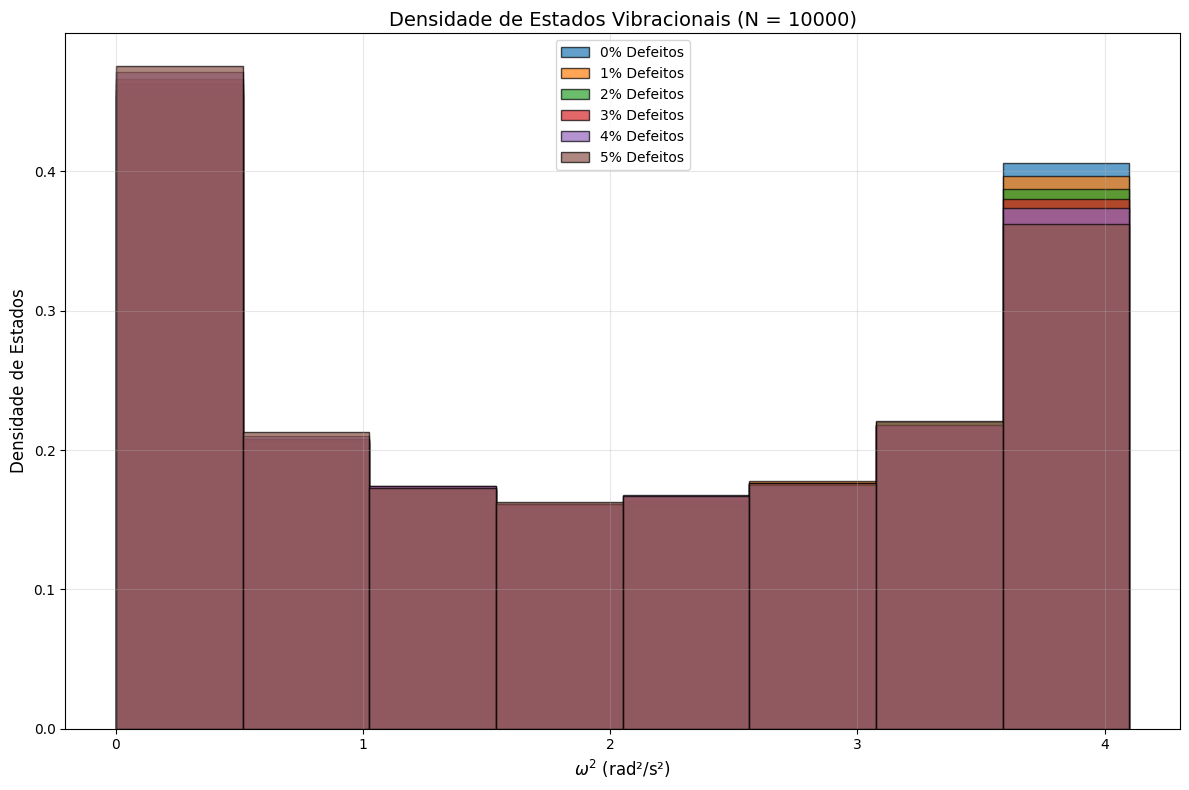

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.linalg import eigh_tridiagonal

# Parâmetros
m = 1.0          # Massa base (kg)
k = 1.0          # Constante elástica (kg/s²)
N_values = [100, 1000, 10000]  # Tamanhos das cadeias
defect_fractions = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05]  # Frações de defeitos
num_bins = 8     # Número de bins para o histograma (reduzido para barras mais visíveis)
omega2_max = 4.1  # Valor máximo de ω² para histogramas
np.random.seed(42) # Semente para reprodutibilidade

# Função para gerar vetor de massas com defeitos
def generate_masses(N, defect_fraction):
    masses = np.full(N, m)  # Todos átomos com massa m
    if defect_fraction > 0:
        num_defects = int(N * defect_fraction)
        defect_indices = np.random.choice(N, num_defects, replace=False)
        masses[defect_indices] = 3 * m  # Defeitos com massa 3m
    return masses

# Função para calcular as frequências ao quadrado (autovalores)
def compute_frequencies(masses, k):
    N = len(masses)
    # Diagonal principal
    main_diag = np.zeros(N)
    main_diag[0] = k / masses[0]        # Primeiro átomo
    main_diag[-1] = k / masses[-1]       # Último átomo
    if N > 2:
        main_diag[1:-1] = 2 * k / masses[1:-1]  # Átomos internos
    
    # Diagonal secundária
    off_diag = np.zeros(N-1)
    for i in range(N-1):
        off_diag[i] = -k / np.sqrt(masses[i] * masses[i+1])
    
    # Calcular autovalores (ω²)
    eigenvalues = eigh_tridiagonal(main_diag, off_diag, eigvals_only=True)
    return eigenvalues

# Simulação para cada tamanho de cadeia
for N in N_values:
    plt.figure(figsize=(12, 8))
    print(f"\nCalculando N = {N}...")
    
    for frac in defect_fractions:
        start_time = time.time()
        # Gerar massas e calcular frequências
        masses = generate_masses(N, frac)
        eigenvalues = compute_frequencies(masses, k)
        
        # Calcular histograma (Densidade de Estados)
        hist, bin_edges = np.histogram(eigenvalues, bins=num_bins, range=(0, omega2_max), density=True)
        bin_width = bin_edges[1] - bin_edges[0]
        bin_centers = bin_edges[:-1] + bin_width / 2  # Centraliza as barras
        
        # Plotar DOS com BARRAS
        plt.bar(
            bin_centers, 
            hist, 
            width=bin_width, 
            alpha=0.7, 
            label=f'{frac*100:.0f}% Defeitos',
            edgecolor='black'
        )
        print(f"  Fração {frac*100}%: {time.time()-start_time:.2f} segundos")
    
    plt.title(f'Densidade de Estados Vibracionais (N = {N})', fontsize=14)
    plt.xlabel('$\omega^2$ (rad²/s²)', fontsize=12)
    plt.ylabel('Densidade de Estados', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'dos_N{N}.png', dpi=300, bbox_inches='tight')
    plt.show()

<>:107: SyntaxWarning: invalid escape sequence '\o'
<>:107: SyntaxWarning: invalid escape sequence '\o'
C:\Users\v.bezerra\AppData\Local\Temp\ipykernel_15948\1494245413.py:107: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('$\omega^2$ (rad²/s²)', fontsize=10)



Calculando N = 100...
  Fração 0%: 0.00 segundos
  Fração 1%: 0.00 segundos
  Fração 2%: 0.00 segundos
  Fração 3%: 0.00 segundos
  Fração 4%: 0.00 segundos
  Fração 5%: 0.00 segundos


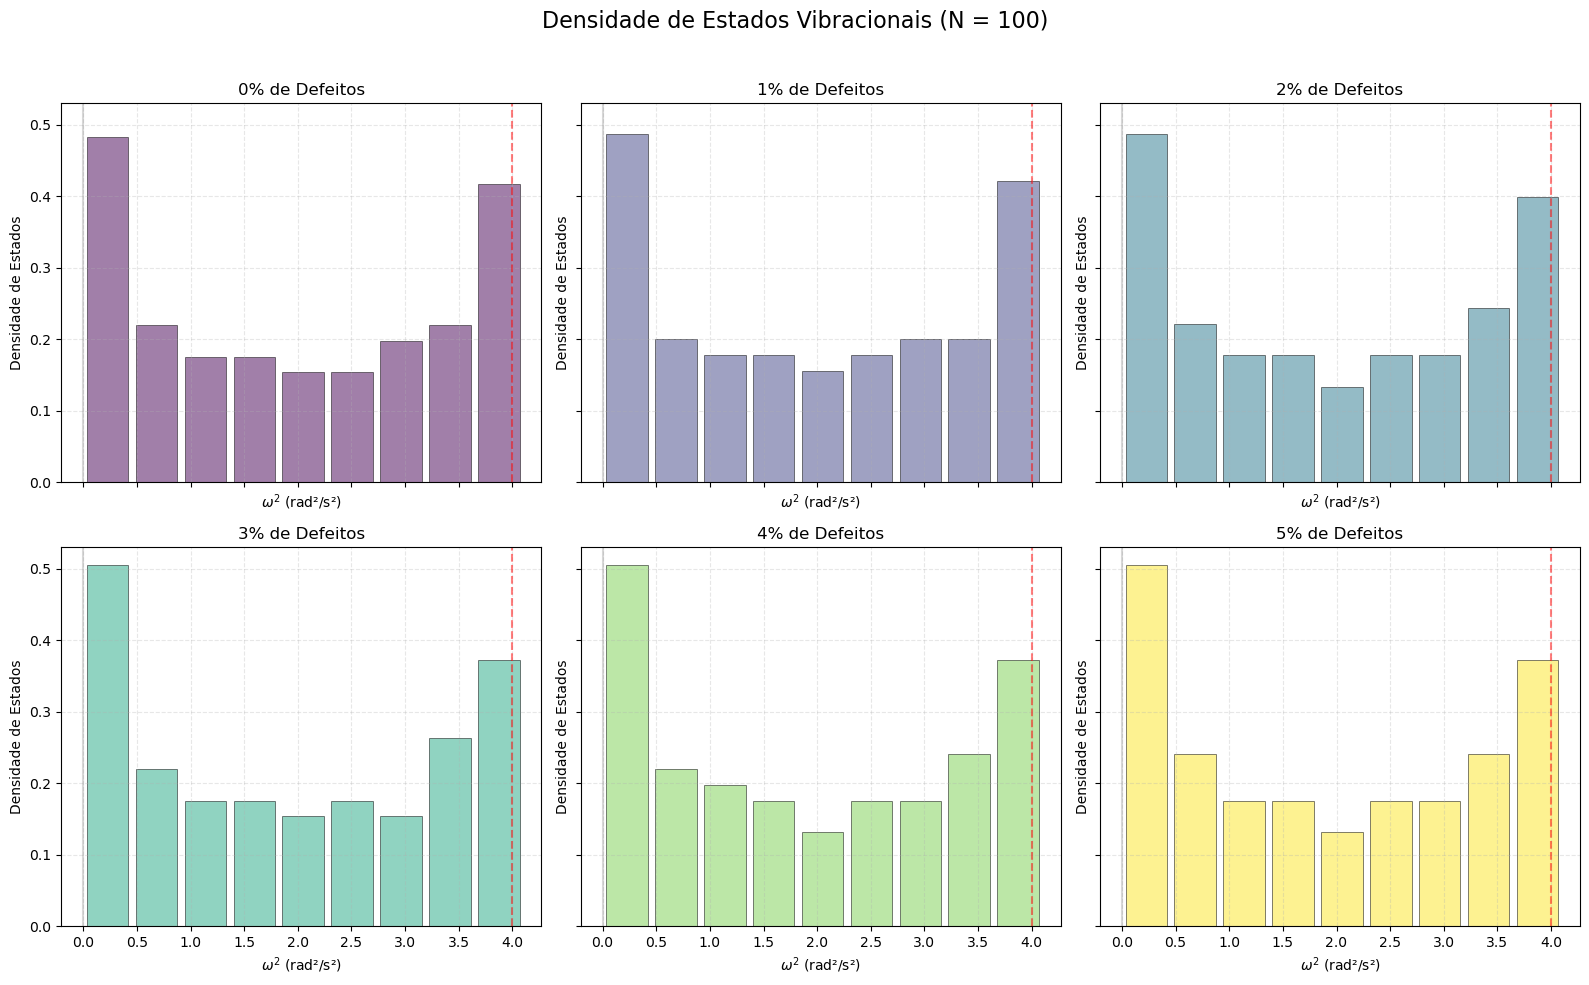


Calculando N = 1000...
  Fração 0%: 0.03 segundos
  Fração 1%: 0.02 segundos
  Fração 2%: 0.02 segundos
  Fração 3%: 0.03 segundos
  Fração 4%: 0.03 segundos
  Fração 5%: 0.02 segundos


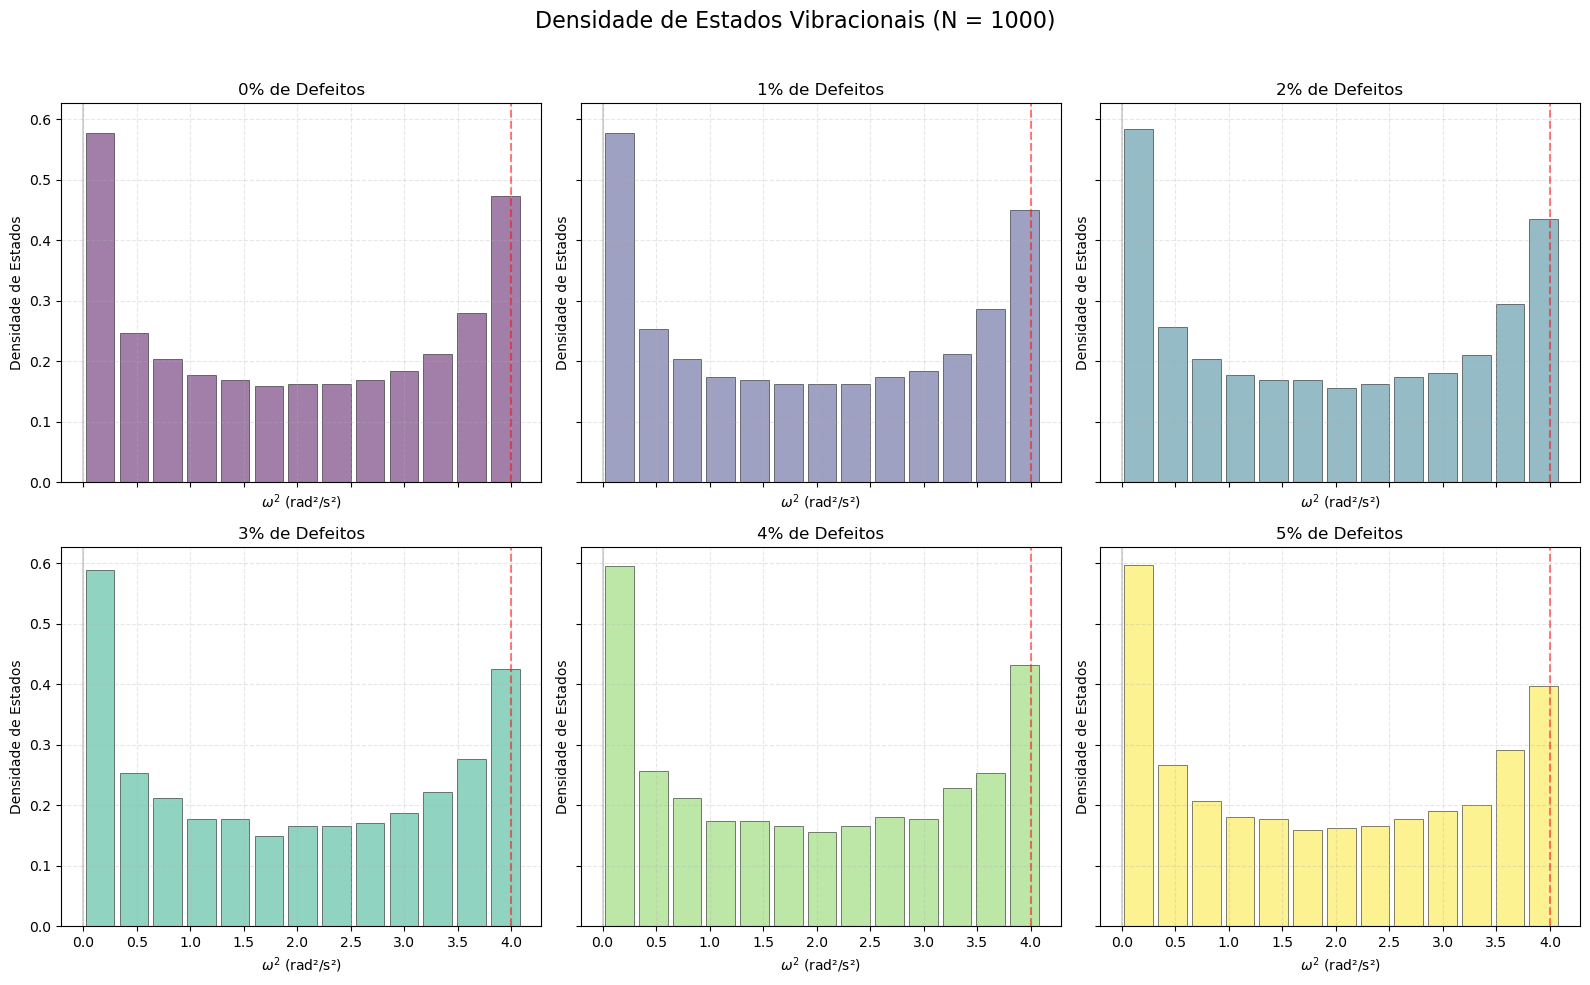


Calculando N = 10000...
  Fração 0%: 2.04 segundos
  Fração 1%: 2.29 segundos
  Fração 2%: 2.27 segundos
  Fração 3%: 2.28 segundos
  Fração 4%: 2.33 segundos
  Fração 5%: 2.26 segundos


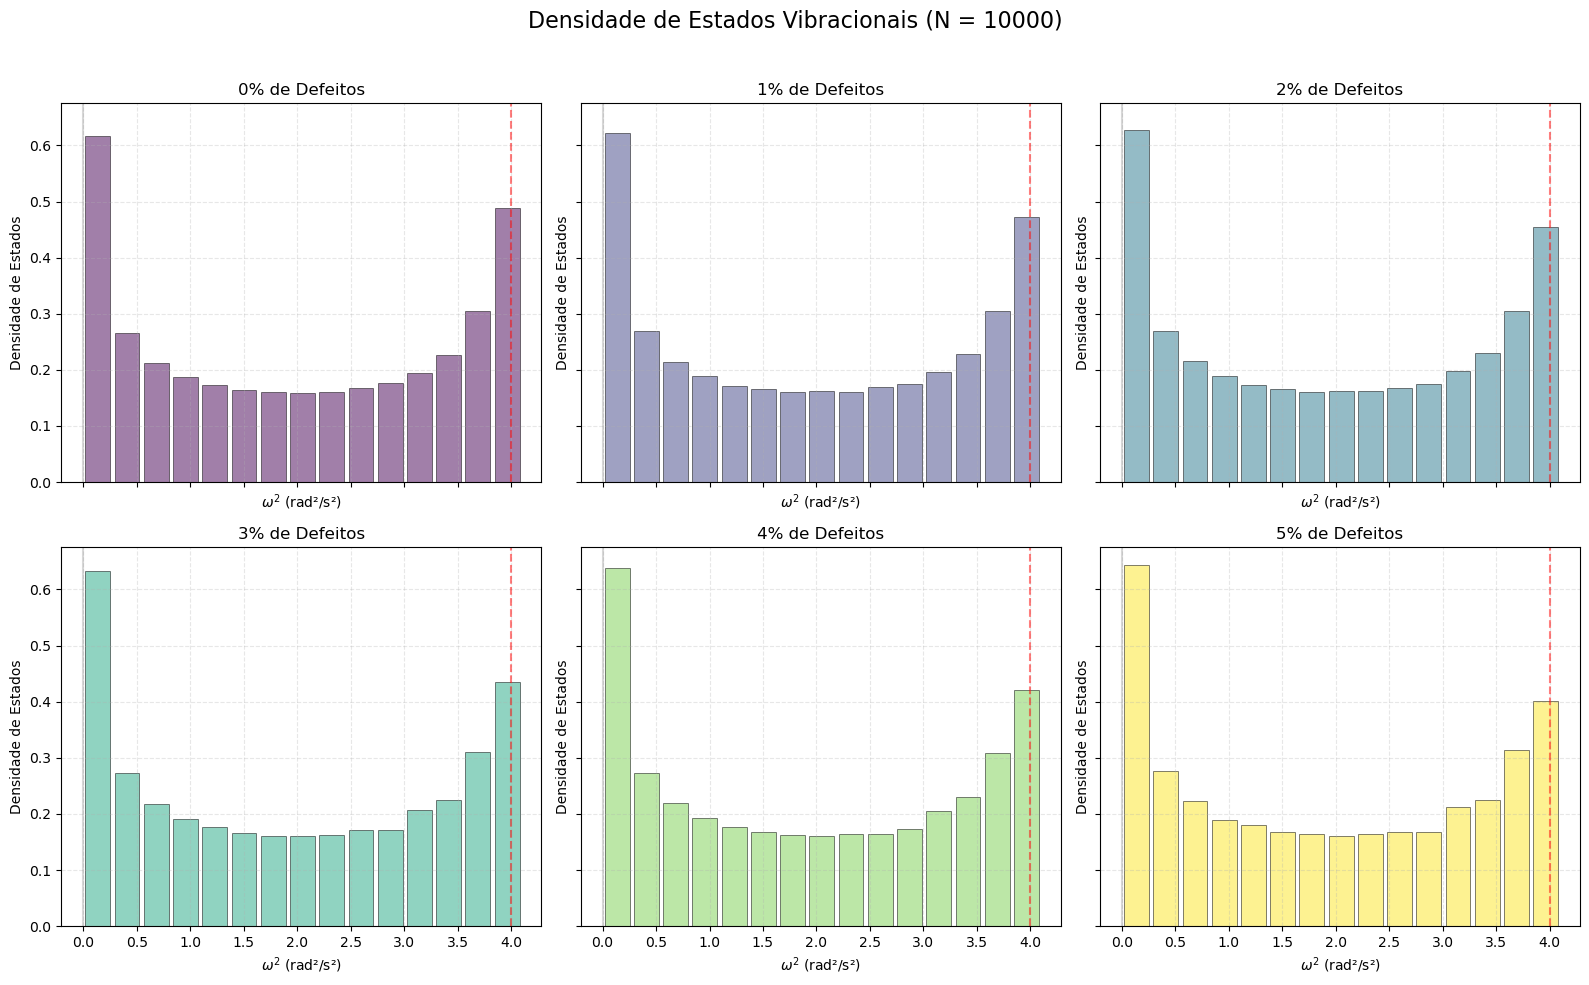

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.linalg import eigh_tridiagonal
import matplotlib.cm as cm

# Parâmetros
m = 1.0          # Massa base (kg)
k = 1.0          # Constante elástica (kg/s²)
N_values = [100, 1000, 10000]  # Tamanhos das cadeias
defect_fractions = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05]  # Frações de defeitos
num_bins = [9,13,15]    # Número de bins para o histograma
omega2_max = 4.1 # Valor máximo de ω² para histogramas
np.random.seed(42) # Semente para reprodutibilidade

# Paleta de cores
colors = cm.viridis(np.linspace(0, 1, len(defect_fractions)))

# Função para gerar vetor de massas com defeitos
def generate_masses(N, defect_fraction):
    masses = np.full(N, m)  # Todos átomos com massa m
    if defect_fraction > 0:
        num_defects = int(N * defect_fraction)
        defect_indices = np.random.choice(N, num_defects, replace=False)
        masses[defect_indices] = 3 * m  # Defeitos com massa 3m
    return masses

# Função para calcular as frequências ao quadrado (autovalores)
def compute_frequencies(masses, k):
    N = len(masses)
    # Diagonal principal
    main_diag = np.zeros(N)
    main_diag[0] = k / masses[0]        # Primeiro átomo
    main_diag[-1] = k / masses[-1]       # Último átomo
    if N > 2:
        main_diag[1:-1] = 2 * k / masses[1:-1]  # Átomos internos
    
    # Diagonal secundária
    off_diag = np.zeros(N-1)
    for i in range(N-1):
        off_diag[i] = -k / np.sqrt(masses[i] * masses[i+1])
    
    # Calcular autovalores (ω²)
    eigenvalues = eigh_tridiagonal(main_diag, off_diag, eigvals_only=True)
    return eigenvalues

# Simulação para cada tamanho de cadeia

aux_bins = 0
for N in N_values:
    # Criar figura com subplots para cada fração
    fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharex=True, sharey=True)
    fig.suptitle(f'Densidade de Estados Vibracionais (N = {N})', fontsize=16, y=0.98)
    
    print(f"\nCalculando N = {N}...")
    eigenvalues_data = []
    
    # Primeiro: calcular todos os dados
    for frac_idx, frac in enumerate(defect_fractions):
        start_time = time.time()
        masses = generate_masses(N, frac)
        eigenvalues = compute_frequencies(masses, k)
        eigenvalues_data.append(eigenvalues)
        print(f"  Fração {frac*100:.0f}%: {time.time()-start_time:.2f} segundos")
    
    # Determinar bins comuns para todos
    all_eigenvalues = np.concatenate(eigenvalues_data)
    hist_all, bin_edges = np.histogram(all_eigenvalues, bins=num_bins[aux_bins], range=(0, omega2_max), density=True)
    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = bin_edges[:-1] + bin_width / 2
    
    aux_bins += 1  #Auxiliar para a lista de bins
    # Segundo: plotar cada fração em seu próprio subplot
    for frac_idx, (frac, eigenvalues) in enumerate(zip(defect_fractions, eigenvalues_data)):
        ax = axes[frac_idx//3, frac_idx%3]  # Selecionar subplot (2 linhas, 3 colunas)
        
        # Calcular histograma
        hist, _ = np.histogram(eigenvalues, bins=bin_edges, density=True)
        
        # Plotar barras
        ax.bar(
            bin_centers, 
            hist, 
            width=bin_width * 0.85,  # 85% da largura para espaço entre barras
            alpha=0.5, 
            color=colors[frac_idx],
            edgecolor='black',
            linewidth=0.7
        )
        
        # Adicionar título e informação
        ax.set_title(f'{frac*100:.0f}% de Defeitos', fontsize=12)
        ax.grid(True, alpha=0.3, linestyle='--')
        
        # Adicionar linhas de referência
        ax.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
        ax.axvline(x=4, color='red', linestyle='--', alpha=0.5)
        
        # Adicionar texto informativo
        """
        ax.text(0.05, 0.95, f'Média: {np.mean(eigenvalues):.2f}', 
                transform=ax.transAxes, fontsize=10,
                bbox=dict(facecolor='white', alpha=0.3))
        """
    # Configurar eixos e rótulos
    for ax in axes.flatten():
        ax.set_xlabel('$\omega^2$ (rad²/s²)', fontsize=10)
        ax.set_ylabel('Densidade de Estados', fontsize=10)
    
    # Ajustar layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Espaço para o título superior
    plt.savefig(f'dos_N{N}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.linalg import eigh_tridiagonal

# Parâmetros
N = 100  # Tamanho da cadeia
defect_fraction = 0.7 # Fração de defeitos
m = 1.0
k = 1.0

# Configurar semente para reprodutibilidade
np.random.seed(00)

# Gerar massas e defeitos
masses = np.full(N, m)
defect_indices = np.random.choice(N, int(N * defect_fraction), replace=False)
masses[defect_indices] = 3 * m
  
# Calcular matriz dinâmica
main_diag = np.zeros(N)
main_diag[0] = k / masses[0]
main_diag[-1] = k / masses[-1]
main_diag[1:-1] = 2 * k / masses[1:-1]

off_diag = np.zeros(N-1)
for i in range(N-1):
    off_diag[i] = -k / np.sqrt(masses[i] * masses[i+1])

# Obter autovalores e autovetores
eigenvals, eigenvecs = eigh_tridiagonal(main_diag, off_diag)

# Selecionar o segundo modo (índice 1) - primeiro modo não-nulo
mode_index = 1
omega = np.sqrt(eigenvals[mode_index])
mode_vector = eigenvecs[:, mode_index]

In [11]:
# Converter para frequências (ω = sqrt(ω²))

# Obter índices ordenados das frequências (do menor para o maior)
indices_ordenados = np.argsort(np.sqrt(eigenvals))
print(indices_ordenados)
# Ordenar as frequências e autovalores conforme os índices
frequencias_ordenadas = eigenvals[indices_ordenados]
autovalores_ordenados = eigenvals[indices_ordenados]

# Resultados
print("Lista original de autovalores (ω²):", eigenvals)
print("Frequências correspondentes (ω):", np.sqrt(eigenvals))
print("\nÍndices originais em ordem crescente de frequência:", indices_ordenados)
print("Frequências ordenadas:", frequencias_ordenadas)
print("Autovalores ordenados:", autovalores_ordenados)

# Para acessar o índice original do 3º menor frequência:
n = 3  # Queremos o 3º menor
print(f"\nO {n}º menor frequência é {frequencias_ordenadas[n-1]:.4f} rad/s")
print(f"Seu índice na lista original é {indices_ordenados[n-1]}")
print(f"Seu autovalor correspondente é {autovalores_ordenados[n-1]:.4f} (ω²)")
    

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99  0]
Lista original de autovalores (ω²): [-4.30211431e-17  4.08835235e-04  1.62066617e-03  3.70148319e-03
  6.70665940e-03  1.01761825e-02  1.49996396e-02  2.02898573e-02
  2.67126034e-02  3.30199101e-02  4.26371511e-02  4.76149383e-02
  5.69924494e-02  6.86129788e-02  7.82161593e-02  9.03498396e-02
  9.91014163e-02  1.14178063e-01  1.36276085e-01  1.44843318e-01
  1.57423319e-01  1.67801389e-01  1.86927967e-01  2.10835221e-01
  2.21318198e-01  2.35482309e-01  2.59322869e-01  2.87337477e-01
  2.99638811e-01  3.20449144e-01  3.41237659e-01  3.52254807e-01
  3.81766725e-01  4.06019113e-01  4.17847637e-01  4.44012680e-01
  4.55351524e-01  4.85001907e-01  5.30377144e-01  5.32599784e-01
  5.5981

C:\Users\v.bezerra\AppData\Local\Temp\ipykernel_15948\3986936179.py:4: RuntimeWarning: invalid value encountered in sqrt
  indices_ordenados = np.argsort(np.sqrt(eigenvals))
C:\Users\v.bezerra\AppData\Local\Temp\ipykernel_15948\3986936179.py:12: RuntimeWarning: invalid value encountered in sqrt
  print("Frequências correspondentes (ω):", np.sqrt(eigenvals))


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

def is_hermitian(matrix, tol=1e-10):
    """Verifica se uma matriz é Hermitiana (igual à sua transposta conjugada)."""
    # Para matrizes reais, basta verificar se é simétrica
    if np.iscomplexobj(matrix):
        return np.allclose(matrix, matrix.conj().T, atol=tol)
    else:
        return np.allclose(matrix, matrix.T, atol=tol)

def main():
    # Parâmetros do sistema
    N = 1000  # Tamanho da cadeia (recomendado <= 1000 para verificação eficiente)
    defect_fraction = 0.05  # Fração de defeitos
    m = 1.0  # Massa base
    k = 1.0  # Constante elástica
    np.random.seed(42)  # Para reprodutibilidade
    
    # Gerar massas com defeitos
    masses = np.full(N, m)
    if defect_fraction > 0:
        num_defects = int(N * defect_fraction)
        defect_indices = np.random.choice(N, num_defects, replace=False)
        masses[defect_indices] = 3 * m
    
    # Construir diagonais da matriz dinâmica
    main_diag = np.zeros(N)
    main_diag[0] = k / masses[0]        # Primeiro átomo
    main_diag[-1] = k / masses[-1]       # Último átomo
    if N > 2:
        main_diag[1:-1] = 2 * k / masses[1:-1]  # Átomos internos
    
    off_diag = np.zeros(N-1)
    for i in range(N-1):
        off_diag[i] = -k / np.sqrt(masses[i] * masses[i+1])
    
    # =====================================================
    # Verificação se a matriz é Hermitiana
    # =====================================================
    # Construir matriz completa (apenas para verificação)
    D_matrix = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
    
    # Verificar simetria
    hermitian = is_hermitian(D_matrix)
    
    print("\n" + "="*60)
    print(f"VERIFICAÇÃO DA MATRIZ DINÂMICA (N = {N})")
    print("="*60)
    print(f"• A matriz é Hermitiana? {'SIM' if hermitian else 'NÃO'}")
    
    # Mostrar submatriz 3x3 como exemplo
    print("\nSubmatriz 3x3 de exemplo:")
    print(D_matrix[:3, :3])
    
    # Calcular e mostrar norma da diferença D - D.T
    diff_norm = np.linalg.norm(D_matrix - D_matrix.T)
    print(f"\n• Norma da diferença ||D - Dᵀ|| = {diff_norm:.5e}")
    print("="*60 + "\n")
    
    # =====================================================
    # Cálculo dos autovalores e autovetores
    # =====================================================
    eigenvalues, eigenvectors = eigh_tridiagonal(main_diag, off_diag)
    frequencies = np.sqrt(eigenvalues)
    
    # Selecionar 5 menores e 5 maiores frequências
    sorted_indices = np.argsort(frequencies)
    min_indices = sorted_indices[:5]
    max_indices = sorted_indices[-5:]
    
    # Resultados
    print("\n" + "="*60)
    print("RESULTADOS PRINCIPAIS")
    print("="*60)
    print("\n➤ 5 MENORES FREQUÊNCIAS (rad/s):")
    for i, idx in enumerate(min_indices):
        print(f"  Modo {i+1}: ω = {frequencies[idx]:.6f} (índice {idx})")
    
    print("\n➤ 5 MAIORES FREQUÊNCIAS (rad/s):")
    for i, idx in enumerate(max_indices):
        print(f"  Modo {i+1}: ω = {frequencies[idx]:.6f} (índice {idx})")
    
if __name__ == "__main__":
    main()


VERIFICAÇÃO DA MATRIZ DINÂMICA (N = 1000)
• A matriz é Hermitiana? SIM

Submatriz 3x3 de exemplo:
[[ 1. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]

• Norma da diferença ||D - Dᵀ|| = 0.00000e+00


RESULTADOS PRINCIPAIS

➤ 5 MENORES FREQUÊNCIAS (rad/s):
  Modo 1: ω = 0.000000 (índice 0)
  Modo 2: ω = 0.002994 (índice 1)
  Modo 3: ω = 0.005992 (índice 2)
  Modo 4: ω = 0.008962 (índice 3)
  Modo 5: ω = 0.012037 (índice 4)

➤ 5 MAIORES FREQUÊNCIAS (rad/s):
  Modo 1: ω = 1.998618 (índice 995)
  Modo 2: ω = 1.999023 (índice 996)
  Modo 3: ω = 1.999023 (índice 997)
  Modo 4: ω = 1.999306 (índice 998)
  Modo 5: ω = 1.999320 (índice 999)
